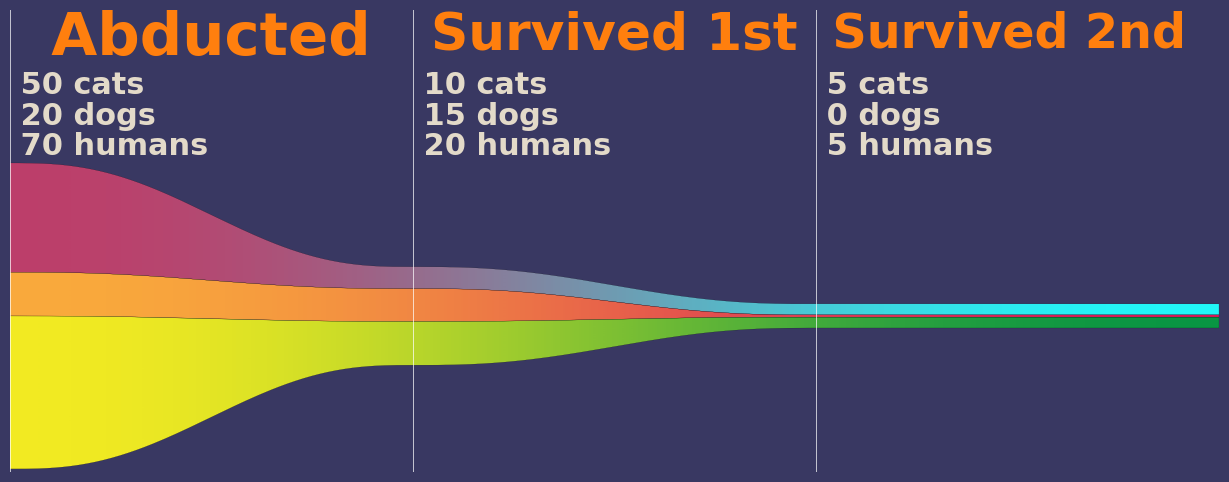

In [4]:
import matplotlib.pyplot as plt
from graph.funel_graph import FunelGraph
colors = [
    ['#C33764', '#1BFFFF'],
    ['#FBB03B', '#D4145A'],
    ['#FCEE21', '#009245'],
    ['#1BFFFF', '#e05153'],
    ['#009245', '#FCEE21']
    ]

fg = FunelGraph()
fg.prepare(data_path="data/data.csv", label_path="data/labels.csv", normaliseQ=True)
fg.draw(colors=colors, visible=False, axesQ=False)
plt.savefig('data\example.png')
plt.show()

In [3]:
fg.data_dict

{'graph_data': array([[50, 10, 10],
        [20, 15,  0],
        [70, 20,  5]], dtype=int64),
 'data_labels': ['Initial', 'Hold', 'Final'],
 'label_data': array([[' 50 cats', ' 10 cats', ' 10 cats'],
        [' 20 dogs', ' 15 dogs', ' 0 dogs'],
        [' 70 humans', ' 20 humans', ' 5 humans']], dtype='<U10'),
 'labels': ['  Abducted  ', ' Survived 1st ', ' Survived 2nd  '],
 'colors': [<matplotlib.colors.LinearSegmentedColormap at 0x183ffd2ec20>,
  <matplotlib.colors.LinearSegmentedColormap at 0x18382387fa0>]}

In [ ]:
# backup

# Initial;Hold;Final;Afterlife
# 50  - Can't;10;10;5
# 20  - Win;15;5;0
# 70  - Them;50;15;5
# 20  - All;15;10;5

# Initial;Hold;Final;Afterlife
# 50;10;10;5
# 20;15;5;0
# 70;50;15;5
# 20;15;10;5